# Import Libraries

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import os
import cv2

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import Linear, ReLU, Sigmoid, CrossEntropyLoss, Sequential, Conv2d, ConvTranspose2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from skimage import io
import torch.nn.functional as f

# Load dataset

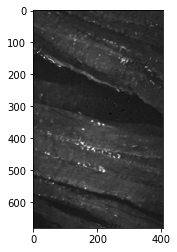

In [2]:
# loading dataset
data_dir = '/home/jessew/engrprojects/WilsonGroup/TuCo/data/20210920 modify SVD_mods_Arya/620nm/'
filenames = os.listdir(data_dir)
# print(filenames)
img_stack = []
for files in filenames:
    img = io.imread(data_dir + files)
    plt.imshow(img[:,:,5], cmap='gray')
#     plt.show()
    img_stack.append(img)

In [3]:
# convert images to numpy arrays
img_stack = np.asarray(img_stack)
img_stack = img_stack.astype('float32')
print(img_stack.shape)

(25, 681, 406, 9)


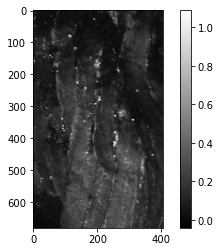

In [4]:
# choose a slice and show
plt.imshow(img_stack[2,:,:,5], cmap = 'gray')
plt.colorbar()
plt.show()

In [5]:
# get image height and width metrics
_, nx, ny, nch = img_stack.shape
print('img width = {}, img height = {}, img channels = {}'.format(nx, ny, nch))

img width = 681, img height = 406, img channels = 9


# Define model

In [6]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(nch, 64, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            
            # Defining another 2D convolution layer
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            
            # Defining another 2D convolution layer
            Conv2d(64, 64, kernel_size=1, stride=1),
            ReLU(inplace=True),
            
            # Defining another 2D convolution layer
            Conv2d(64, 64, kernel_size=1, stride=1),
            ReLU(inplace=True),
            
            # Defining another 2D convolution layer
            Conv2d(64, 3, kernel_size=1, stride=1),
            Sigmoid(),
            Softmax(dim=1)
        )
        
        """The spectral autoencoder has a bottleneck in the number of channels instead of upsampling and downsampling layers"""
        self.cnn_spectral_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, nch, kernel_size=1, stride=1),            
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = self.cnn_spectral_layers(x)
        return x
    
    def forward_enc(self, x):
        z = self.cnn_layers(x)
        return z
    
    def forward_dec(self, z):
        y = self.cnn_spectral_layers(z)
        return y

In [7]:
# instantiate the model by calling the function
model = Net()
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(9, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(64, 3, kernel_size=(1, 1), stride=(1, 1))
    (9): Sigmoid()
    (10): Softmax(dim=1)
  )
  (cnn_spectral_layers): Sequential(
    (0): Conv2d(3, 9, kernel_size=(1, 1), stride=(1, 1))
  )
)


In [8]:
# define loss function
criterion = nn.L1Loss()

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [9]:
# set the model training device
"""cuda:0 for GPU 0, cuda:1 for GPU1, cpu for CPU"""
device = 'cuda:1'
print(device)
model.to(device) # load the model in the training device

cuda:1


Net(
  (cnn_layers): Sequential(
    (0): Conv2d(9, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(64, 3, kernel_size=(1, 1), stride=(1, 1))
    (9): Sigmoid()
    (10): Softmax(dim=1)
  )
  (cnn_spectral_layers): Sequential(
    (0): Conv2d(3, 9, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [10]:
# prepare the input data before training
img_stack = torch.tensor(img_stack)
print(img_stack.shape)
img_stack = img_stack.to(device)

torch.Size([25, 681, 406, 9])


In [11]:
# define latent space visualization function
def visualize_z(ind):
    data = img_stack[ind,:,:,:]
    data = data[None,:]
    data = data.to(device)
    out = model.forward_enc(torch.permute(data, (0, 3, 1, 2)))
    out = out[0,:,:,:]
    out = torch.permute(out, (1,2,0))
    img = out.detach().cpu().numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(1.5*img)
    plt.show()
    return img

# Experiment with variance ordering loss

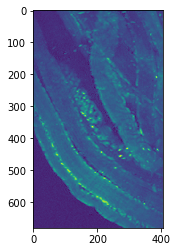

NameError: name 'meansq' is not defined

In [12]:
img=img_stack[1,:,:,3].detach().cpu().numpy()
plt.imshow(img)
plt.show()

meansq(img_stack[1,:,:,0])

In [12]:
def meansq(x):
    return torch.mean(x**2)

def corr(x,y):
    return torch.sum(x*y) / (torch.sqrt(torch.sum(x**2))*torch.sqrt(torch.sum(y**2)))

# Train model

  0%|          | 1/200 [00:01<05:44,  1.73s/it]

Epoch: 1 	Training Loss: 0.221514


  1%|          | 2/200 [00:01<02:51,  1.16it/s]

Epoch: 2 	Training Loss: 0.176283


  2%|▏         | 3/200 [00:02<01:55,  1.70it/s]

Epoch: 3 	Training Loss: 0.146389


  2%|▏         | 4/200 [00:02<01:29,  2.18it/s]

Epoch: 4 	Training Loss: 0.121550


  2%|▎         | 5/200 [00:02<01:15,  2.58it/s]

Epoch: 5 	Training Loss: 0.100906


  3%|▎         | 6/200 [00:03<01:06,  2.91it/s]

Epoch: 6 	Training Loss: 0.085636


  4%|▎         | 7/200 [00:03<01:01,  3.16it/s]

Epoch: 7 	Training Loss: 0.075522


  4%|▍         | 8/200 [00:03<00:57,  3.35it/s]

Epoch: 8 	Training Loss: 0.068155


  4%|▍         | 9/200 [00:03<00:54,  3.49it/s]

Epoch: 9 	Training Loss: 0.062825


  5%|▌         | 10/200 [00:04<00:52,  3.59it/s]

Epoch: 10 	Training Loss: 0.059605


  6%|▌         | 11/200 [00:04<00:51,  3.66it/s]

Epoch: 11 	Training Loss: 0.057450


  6%|▌         | 12/200 [00:04<00:50,  3.71it/s]

Epoch: 12 	Training Loss: 0.055579


  6%|▋         | 13/200 [00:04<00:49,  3.75it/s]

Epoch: 13 	Training Loss: 0.053385


  7%|▋         | 14/200 [00:05<00:49,  3.78it/s]

Epoch: 14 	Training Loss: 0.051518


  8%|▊         | 15/200 [00:05<00:48,  3.80it/s]

Epoch: 15 	Training Loss: 0.050123


  8%|▊         | 16/200 [00:05<00:48,  3.81it/s]

Epoch: 16 	Training Loss: 0.048480


  8%|▊         | 17/200 [00:05<00:47,  3.81it/s]

Epoch: 17 	Training Loss: 0.047064


  9%|▉         | 18/200 [00:06<00:47,  3.82it/s]

Epoch: 18 	Training Loss: 0.046819


 10%|▉         | 19/200 [00:06<00:47,  3.83it/s]

Epoch: 19 	Training Loss: 0.045657


 10%|█         | 20/200 [00:06<00:47,  3.83it/s]

Epoch: 20 	Training Loss: 0.044517


 10%|█         | 21/200 [00:06<00:46,  3.83it/s]

Epoch: 21 	Training Loss: 0.043819


 11%|█         | 22/200 [00:07<00:46,  3.83it/s]

Epoch: 22 	Training Loss: 0.042908


 12%|█▏        | 23/200 [00:07<00:46,  3.84it/s]

Epoch: 23 	Training Loss: 0.042519


 12%|█▏        | 24/200 [00:07<00:45,  3.83it/s]

Epoch: 24 	Training Loss: 0.041975


 12%|█▎        | 25/200 [00:07<00:45,  3.83it/s]

Epoch: 25 	Training Loss: 0.041780


 13%|█▎        | 26/200 [00:08<00:45,  3.83it/s]

Epoch: 26 	Training Loss: 0.041014


 14%|█▎        | 27/200 [00:08<00:45,  3.84it/s]

Epoch: 27 	Training Loss: 0.040365


 14%|█▍        | 28/200 [00:08<00:44,  3.84it/s]

Epoch: 28 	Training Loss: 0.039696


 14%|█▍        | 29/200 [00:09<00:44,  3.83it/s]

Epoch: 29 	Training Loss: 0.039360


 15%|█▌        | 30/200 [00:09<00:44,  3.84it/s]

Epoch: 30 	Training Loss: 0.038760


 16%|█▌        | 31/200 [00:09<00:44,  3.84it/s]

Epoch: 31 	Training Loss: 0.038314


 16%|█▌        | 32/200 [00:09<00:43,  3.84it/s]

Epoch: 32 	Training Loss: 0.037956


 16%|█▋        | 33/200 [00:10<00:43,  3.83it/s]

Epoch: 33 	Training Loss: 0.037409


 17%|█▋        | 34/200 [00:10<00:43,  3.84it/s]

Epoch: 34 	Training Loss: 0.037090


 18%|█▊        | 35/200 [00:10<00:43,  3.84it/s]

Epoch: 35 	Training Loss: 0.036543


 18%|█▊        | 36/200 [00:10<00:42,  3.84it/s]

Epoch: 36 	Training Loss: 0.036276


 18%|█▊        | 37/200 [00:11<00:42,  3.83it/s]

Epoch: 37 	Training Loss: 0.035807


 19%|█▉        | 38/200 [00:11<00:42,  3.84it/s]

Epoch: 38 	Training Loss: 0.035385


 20%|█▉        | 39/200 [00:11<00:41,  3.84it/s]

Epoch: 39 	Training Loss: 0.035077


 20%|██        | 40/200 [00:11<00:41,  3.83it/s]

Epoch: 40 	Training Loss: 0.034649


 20%|██        | 41/200 [00:12<00:41,  3.83it/s]

Epoch: 41 	Training Loss: 0.034366


 21%|██        | 42/200 [00:12<00:41,  3.83it/s]

Epoch: 42 	Training Loss: 0.033877


 22%|██▏       | 43/200 [00:12<00:40,  3.84it/s]

Epoch: 43 	Training Loss: 0.033799


 22%|██▏       | 44/200 [00:12<00:40,  3.83it/s]

Epoch: 44 	Training Loss: 0.033205


 22%|██▎       | 45/200 [00:13<00:40,  3.83it/s]

Epoch: 45 	Training Loss: 0.032805


 23%|██▎       | 46/200 [00:13<00:40,  3.83it/s]

Epoch: 46 	Training Loss: 0.032508


 24%|██▎       | 47/200 [00:13<00:39,  3.84it/s]

Epoch: 47 	Training Loss: 0.032111


 24%|██▍       | 48/200 [00:13<00:39,  3.83it/s]

Epoch: 48 	Training Loss: 0.031971


 24%|██▍       | 49/200 [00:14<00:39,  3.83it/s]

Epoch: 49 	Training Loss: 0.031473
Epoch: 50 	Training Loss: 0.031529


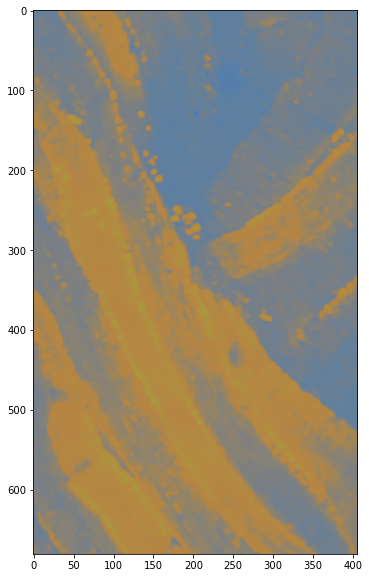

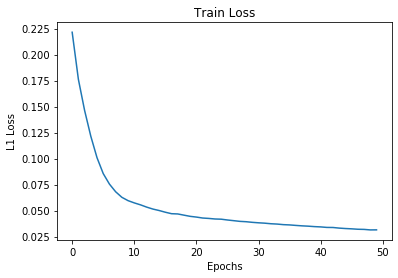

 26%|██▌       | 51/200 [00:15<00:46,  3.18it/s]

Epoch: 51 	Training Loss: 0.030883


 26%|██▌       | 52/200 [00:15<00:44,  3.35it/s]

Epoch: 52 	Training Loss: 0.030686


 26%|██▋       | 53/200 [00:15<00:42,  3.48it/s]

Epoch: 53 	Training Loss: 0.030312


 27%|██▋       | 54/200 [00:15<00:40,  3.58it/s]

Epoch: 54 	Training Loss: 0.030149


 28%|██▊       | 55/200 [00:16<00:39,  3.65it/s]

Epoch: 55 	Training Loss: 0.029760


 28%|██▊       | 56/200 [00:16<00:38,  3.70it/s]

Epoch: 56 	Training Loss: 0.029733


 28%|██▊       | 57/200 [00:16<00:38,  3.74it/s]

Epoch: 57 	Training Loss: 0.029205


 29%|██▉       | 58/200 [00:16<00:37,  3.76it/s]

Epoch: 58 	Training Loss: 0.029042


 30%|██▉       | 59/200 [00:17<00:37,  3.78it/s]

Epoch: 59 	Training Loss: 0.028743


 30%|███       | 60/200 [00:17<00:36,  3.80it/s]

Epoch: 60 	Training Loss: 0.028591


 30%|███       | 61/200 [00:17<00:36,  3.81it/s]

Epoch: 61 	Training Loss: 0.028279


 31%|███       | 62/200 [00:17<00:36,  3.81it/s]

Epoch: 62 	Training Loss: 0.028207


 32%|███▏      | 63/200 [00:18<00:35,  3.82it/s]

Epoch: 63 	Training Loss: 0.027784


 32%|███▏      | 64/200 [00:18<00:35,  3.82it/s]

Epoch: 64 	Training Loss: 0.027502


 32%|███▎      | 65/200 [00:18<00:35,  3.83it/s]

Epoch: 65 	Training Loss: 0.027449


 33%|███▎      | 66/200 [00:18<00:35,  3.83it/s]

Epoch: 66 	Training Loss: 0.027122


 34%|███▎      | 67/200 [00:19<00:34,  3.83it/s]

Epoch: 67 	Training Loss: 0.027092


 34%|███▍      | 68/200 [00:19<00:34,  3.83it/s]

Epoch: 68 	Training Loss: 0.026748


 34%|███▍      | 69/200 [00:19<00:34,  3.83it/s]

Epoch: 69 	Training Loss: 0.026796


 35%|███▌      | 70/200 [00:19<00:33,  3.83it/s]

Epoch: 70 	Training Loss: 0.026392


 36%|███▌      | 71/200 [00:20<00:33,  3.83it/s]

Epoch: 71 	Training Loss: 0.026329


 36%|███▌      | 72/200 [00:20<00:33,  3.83it/s]

Epoch: 72 	Training Loss: 0.026030


 36%|███▋      | 73/200 [00:20<00:33,  3.83it/s]

Epoch: 73 	Training Loss: 0.025957


 37%|███▋      | 74/200 [00:21<00:32,  3.83it/s]

Epoch: 74 	Training Loss: 0.025675


 38%|███▊      | 75/200 [00:21<00:32,  3.83it/s]

Epoch: 75 	Training Loss: 0.025600


 38%|███▊      | 76/200 [00:21<00:32,  3.83it/s]

Epoch: 76 	Training Loss: 0.025318


 38%|███▊      | 77/200 [00:21<00:32,  3.83it/s]

Epoch: 77 	Training Loss: 0.025237


 39%|███▉      | 78/200 [00:22<00:31,  3.83it/s]

Epoch: 78 	Training Loss: 0.024951


 40%|███▉      | 79/200 [00:22<00:31,  3.83it/s]

Epoch: 79 	Training Loss: 0.024861


 40%|████      | 80/200 [00:22<00:31,  3.83it/s]

Epoch: 80 	Training Loss: 0.024472


 40%|████      | 81/200 [00:22<00:31,  3.83it/s]

Epoch: 81 	Training Loss: 0.024406


 41%|████      | 82/200 [00:23<00:30,  3.83it/s]

Epoch: 82 	Training Loss: 0.024362


 42%|████▏     | 83/200 [00:23<00:30,  3.82it/s]

Epoch: 83 	Training Loss: 0.024004


 42%|████▏     | 84/200 [00:23<00:30,  3.83it/s]

Epoch: 84 	Training Loss: 0.024151


 42%|████▎     | 85/200 [00:23<00:30,  3.83it/s]

Epoch: 85 	Training Loss: 0.023884


 43%|████▎     | 86/200 [00:24<00:29,  3.82it/s]

Epoch: 86 	Training Loss: 0.023801


 44%|████▎     | 87/200 [00:24<00:29,  3.83it/s]

Epoch: 87 	Training Loss: 0.023972


 44%|████▍     | 88/200 [00:24<00:29,  3.83it/s]

Epoch: 88 	Training Loss: 0.023280


 44%|████▍     | 89/200 [00:24<00:28,  3.83it/s]

Epoch: 89 	Training Loss: 0.023017


 45%|████▌     | 90/200 [00:25<00:28,  3.83it/s]

Epoch: 90 	Training Loss: 0.023275


 46%|████▌     | 91/200 [00:25<00:28,  3.83it/s]

Epoch: 91 	Training Loss: 0.022759


 46%|████▌     | 92/200 [00:25<00:28,  3.83it/s]

Epoch: 92 	Training Loss: 0.022661


 46%|████▋     | 93/200 [00:25<00:27,  3.83it/s]

Epoch: 93 	Training Loss: 0.022885


 47%|████▋     | 94/200 [00:26<00:27,  3.83it/s]

Epoch: 94 	Training Loss: 0.022547


 48%|████▊     | 95/200 [00:26<00:27,  3.83it/s]

Epoch: 95 	Training Loss: 0.022401


 48%|████▊     | 96/200 [00:26<00:27,  3.83it/s]

Epoch: 96 	Training Loss: 0.022268


 48%|████▊     | 97/200 [00:27<00:26,  3.83it/s]

Epoch: 97 	Training Loss: 0.022089


 49%|████▉     | 98/200 [00:27<00:26,  3.82it/s]

Epoch: 98 	Training Loss: 0.022237


 50%|████▉     | 99/200 [00:27<00:26,  3.83it/s]

Epoch: 99 	Training Loss: 0.021965
Epoch: 100 	Training Loss: 0.022128


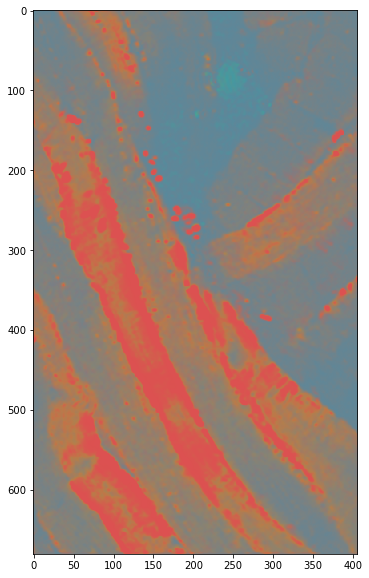

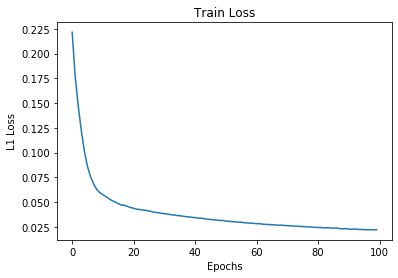

 50%|█████     | 101/200 [00:28<00:31,  3.14it/s]

Epoch: 101 	Training Loss: 0.021762


 51%|█████     | 102/200 [00:28<00:29,  3.32it/s]

Epoch: 102 	Training Loss: 0.021720


 52%|█████▏    | 103/200 [00:28<00:28,  3.46it/s]

Epoch: 103 	Training Loss: 0.021452


 52%|█████▏    | 104/200 [00:29<00:27,  3.55it/s]

Epoch: 104 	Training Loss: 0.021667


 52%|█████▎    | 105/200 [00:29<00:26,  3.63it/s]

Epoch: 105 	Training Loss: 0.021458


 53%|█████▎    | 106/200 [00:29<00:25,  3.69it/s]

Epoch: 106 	Training Loss: 0.021029


 54%|█████▎    | 107/200 [00:29<00:24,  3.73it/s]

Epoch: 107 	Training Loss: 0.021281


 54%|█████▍    | 108/200 [00:30<00:24,  3.75it/s]

Epoch: 108 	Training Loss: 0.021438


 55%|█████▍    | 109/200 [00:30<00:24,  3.77it/s]

Epoch: 109 	Training Loss: 0.020931


 55%|█████▌    | 110/200 [00:30<00:23,  3.79it/s]

Epoch: 110 	Training Loss: 0.021010


 56%|█████▌    | 111/200 [00:30<00:23,  3.80it/s]

Epoch: 111 	Training Loss: 0.021126


 56%|█████▌    | 112/200 [00:31<00:23,  3.80it/s]

Epoch: 112 	Training Loss: 0.020765


 56%|█████▋    | 113/200 [00:31<00:22,  3.81it/s]

Epoch: 113 	Training Loss: 0.020818


 57%|█████▋    | 114/200 [00:31<00:22,  3.81it/s]

Epoch: 114 	Training Loss: 0.020786


 57%|█████▊    | 115/200 [00:32<00:22,  3.81it/s]

Epoch: 115 	Training Loss: 0.020329


 58%|█████▊    | 116/200 [00:32<00:22,  3.82it/s]

Epoch: 116 	Training Loss: 0.020572


 58%|█████▊    | 117/200 [00:32<00:21,  3.82it/s]

Epoch: 117 	Training Loss: 0.020722


 59%|█████▉    | 118/200 [00:32<00:21,  3.82it/s]

Epoch: 118 	Training Loss: 0.020230


 60%|█████▉    | 119/200 [00:33<00:21,  3.82it/s]

Epoch: 119 	Training Loss: 0.020358


 60%|██████    | 120/200 [00:33<00:20,  3.82it/s]

Epoch: 120 	Training Loss: 0.020363


 60%|██████    | 121/200 [00:33<00:20,  3.82it/s]

Epoch: 121 	Training Loss: 0.019903


 61%|██████    | 122/200 [00:33<00:20,  3.82it/s]

Epoch: 122 	Training Loss: 0.020183


 62%|██████▏   | 123/200 [00:34<00:20,  3.82it/s]

Epoch: 123 	Training Loss: 0.020145


 62%|██████▏   | 124/200 [00:34<00:19,  3.82it/s]

Epoch: 124 	Training Loss: 0.019936


 62%|██████▎   | 125/200 [00:34<00:19,  3.82it/s]

Epoch: 125 	Training Loss: 0.020331


 63%|██████▎   | 126/200 [00:34<00:19,  3.82it/s]

Epoch: 126 	Training Loss: 0.019866


 64%|██████▎   | 127/200 [00:35<00:19,  3.82it/s]

Epoch: 127 	Training Loss: 0.019969


 64%|██████▍   | 128/200 [00:35<00:18,  3.82it/s]

Epoch: 128 	Training Loss: 0.019478


 64%|██████▍   | 129/200 [00:35<00:18,  3.82it/s]

Epoch: 129 	Training Loss: 0.019722


 65%|██████▌   | 130/200 [00:35<00:18,  3.82it/s]

Epoch: 130 	Training Loss: 0.019682


 66%|██████▌   | 131/200 [00:36<00:18,  3.82it/s]

Epoch: 131 	Training Loss: 0.019495


 66%|██████▌   | 132/200 [00:36<00:17,  3.82it/s]

Epoch: 132 	Training Loss: 0.019910


 66%|██████▋   | 133/200 [00:36<00:17,  3.82it/s]

Epoch: 133 	Training Loss: 0.019467


 67%|██████▋   | 134/200 [00:36<00:17,  3.82it/s]

Epoch: 134 	Training Loss: 0.019349


 68%|██████▊   | 135/200 [00:37<00:17,  3.82it/s]

Epoch: 135 	Training Loss: 0.019145


 68%|██████▊   | 136/200 [00:37<00:16,  3.82it/s]

Epoch: 136 	Training Loss: 0.019376


 68%|██████▊   | 137/200 [00:37<00:16,  3.82it/s]

Epoch: 137 	Training Loss: 0.019208


 69%|██████▉   | 138/200 [00:38<00:16,  3.82it/s]

Epoch: 138 	Training Loss: 0.019101


 70%|██████▉   | 139/200 [00:38<00:15,  3.82it/s]

Epoch: 139 	Training Loss: 0.019472


 70%|███████   | 140/200 [00:38<00:15,  3.82it/s]

Epoch: 140 	Training Loss: 0.019111


 70%|███████   | 141/200 [00:38<00:15,  3.82it/s]

Epoch: 141 	Training Loss: 0.018914


 71%|███████   | 142/200 [00:39<00:15,  3.82it/s]

Epoch: 142 	Training Loss: 0.019197


 72%|███████▏  | 143/200 [00:39<00:14,  3.82it/s]

Epoch: 143 	Training Loss: 0.018899


 72%|███████▏  | 144/200 [00:39<00:14,  3.82it/s]

Epoch: 144 	Training Loss: 0.018654


 72%|███████▎  | 145/200 [00:39<00:14,  3.82it/s]

Epoch: 145 	Training Loss: 0.018994


 73%|███████▎  | 146/200 [00:40<00:14,  3.82it/s]

Epoch: 146 	Training Loss: 0.018778


 74%|███████▎  | 147/200 [00:40<00:13,  3.82it/s]

Epoch: 147 	Training Loss: 0.018782


 74%|███████▍  | 148/200 [00:40<00:13,  3.82it/s]

Epoch: 148 	Training Loss: 0.018516


 74%|███████▍  | 149/200 [00:40<00:13,  3.82it/s]

Epoch: 149 	Training Loss: 0.018743
Epoch: 150 	Training Loss: 0.018562


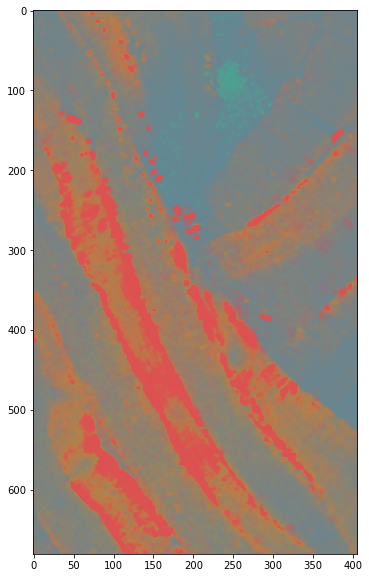

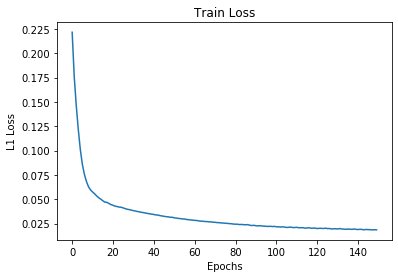

 76%|███████▌  | 151/200 [00:41<00:15,  3.12it/s]

Epoch: 151 	Training Loss: 0.018336


 76%|███████▌  | 152/200 [00:41<00:14,  3.30it/s]

Epoch: 152 	Training Loss: 0.018575


 76%|███████▋  | 153/200 [00:42<00:13,  3.44it/s]

Epoch: 153 	Training Loss: 0.018402


 77%|███████▋  | 154/200 [00:42<00:12,  3.54it/s]

Epoch: 154 	Training Loss: 0.018141


 78%|███████▊  | 155/200 [00:42<00:12,  3.62it/s]

Epoch: 155 	Training Loss: 0.018467


 78%|███████▊  | 156/200 [00:43<00:11,  3.68it/s]

Epoch: 156 	Training Loss: 0.018282


 78%|███████▊  | 157/200 [00:43<00:11,  3.72it/s]

Epoch: 157 	Training Loss: 0.017950


 79%|███████▉  | 158/200 [00:43<00:11,  3.74it/s]

Epoch: 158 	Training Loss: 0.018374


 80%|███████▉  | 159/200 [00:43<00:10,  3.76it/s]

Epoch: 159 	Training Loss: 0.018362


 80%|████████  | 160/200 [00:44<00:10,  3.78it/s]

Epoch: 160 	Training Loss: 0.018416


 80%|████████  | 161/200 [00:44<00:10,  3.79it/s]

Epoch: 161 	Training Loss: 0.018102


 81%|████████  | 162/200 [00:44<00:10,  3.80it/s]

Epoch: 162 	Training Loss: 0.017734


 82%|████████▏ | 163/200 [00:44<00:09,  3.80it/s]

Epoch: 163 	Training Loss: 0.018068


 82%|████████▏ | 164/200 [00:45<00:09,  3.81it/s]

Epoch: 164 	Training Loss: 0.017985


 82%|████████▎ | 165/200 [00:45<00:09,  3.81it/s]

Epoch: 165 	Training Loss: 0.017748


 83%|████████▎ | 166/200 [00:45<00:08,  3.81it/s]

Epoch: 166 	Training Loss: 0.017969


 84%|████████▎ | 167/200 [00:45<00:08,  3.81it/s]

Epoch: 167 	Training Loss: 0.017859


 84%|████████▍ | 168/200 [00:46<00:08,  3.81it/s]

Epoch: 168 	Training Loss: 0.017521


 84%|████████▍ | 169/200 [00:46<00:08,  3.81it/s]

Epoch: 169 	Training Loss: 0.018044


 85%|████████▌ | 170/200 [00:46<00:07,  3.81it/s]

Epoch: 170 	Training Loss: 0.017697


 86%|████████▌ | 171/200 [00:46<00:07,  3.81it/s]

Epoch: 171 	Training Loss: 0.018104


 86%|████████▌ | 172/200 [00:47<00:07,  3.81it/s]

Epoch: 172 	Training Loss: 0.017824


 86%|████████▋ | 173/200 [00:47<00:07,  3.82it/s]

Epoch: 173 	Training Loss: 0.017286


 87%|████████▋ | 174/200 [00:47<00:06,  3.81it/s]

Epoch: 174 	Training Loss: 0.017597


 88%|████████▊ | 175/200 [00:48<00:06,  3.81it/s]

Epoch: 175 	Training Loss: 0.017687


 88%|████████▊ | 176/200 [00:48<00:06,  3.81it/s]

Epoch: 176 	Training Loss: 0.017307


 88%|████████▊ | 177/200 [00:48<00:06,  3.82it/s]

Epoch: 177 	Training Loss: 0.017273


 89%|████████▉ | 178/200 [00:48<00:05,  3.81it/s]

Epoch: 178 	Training Loss: 0.017695


 90%|████████▉ | 179/200 [00:49<00:05,  3.81it/s]

Epoch: 179 	Training Loss: 0.017555


 90%|█████████ | 180/200 [00:49<00:05,  3.81it/s]

Epoch: 180 	Training Loss: 0.017180


 90%|█████████ | 181/200 [00:49<00:04,  3.81it/s]

Epoch: 181 	Training Loss: 0.016898


 91%|█████████ | 182/200 [00:49<00:04,  3.81it/s]

Epoch: 182 	Training Loss: 0.017429


 92%|█████████▏| 183/200 [00:50<00:04,  3.81it/s]

Epoch: 183 	Training Loss: 0.017411


 92%|█████████▏| 184/200 [00:50<00:04,  3.81it/s]

Epoch: 184 	Training Loss: 0.017523


 92%|█████████▎| 185/200 [00:50<00:03,  3.81it/s]

Epoch: 185 	Training Loss: 0.017359


 93%|█████████▎| 186/200 [00:50<00:03,  3.81it/s]

Epoch: 186 	Training Loss: 0.017149


 94%|█████████▎| 187/200 [00:51<00:03,  3.81it/s]

Epoch: 187 	Training Loss: 0.017219


 94%|█████████▍| 188/200 [00:51<00:03,  3.81it/s]

Epoch: 188 	Training Loss: 0.017059


 94%|█████████▍| 189/200 [00:51<00:02,  3.81it/s]

Epoch: 189 	Training Loss: 0.017099


 95%|█████████▌| 190/200 [00:51<00:02,  3.81it/s]

Epoch: 190 	Training Loss: 0.017107


 96%|█████████▌| 191/200 [00:52<00:02,  3.81it/s]

Epoch: 191 	Training Loss: 0.017229


 96%|█████████▌| 192/200 [00:52<00:02,  3.81it/s]

Epoch: 192 	Training Loss: 0.016807


 96%|█████████▋| 193/200 [00:52<00:01,  3.81it/s]

Epoch: 193 	Training Loss: 0.016777


 97%|█████████▋| 194/200 [00:53<00:01,  3.81it/s]

Epoch: 194 	Training Loss: 0.017261


 98%|█████████▊| 195/200 [00:53<00:01,  3.81it/s]

Epoch: 195 	Training Loss: 0.017026


 98%|█████████▊| 196/200 [00:53<00:01,  3.81it/s]

Epoch: 196 	Training Loss: 0.016888


 98%|█████████▊| 197/200 [00:53<00:00,  3.81it/s]

Epoch: 197 	Training Loss: 0.017019


 99%|█████████▉| 198/200 [00:54<00:00,  3.81it/s]

Epoch: 198 	Training Loss: 0.016557


100%|█████████▉| 199/200 [00:54<00:00,  3.81it/s]

Epoch: 199 	Training Loss: 0.016944
Epoch: 200 	Training Loss: 0.016665


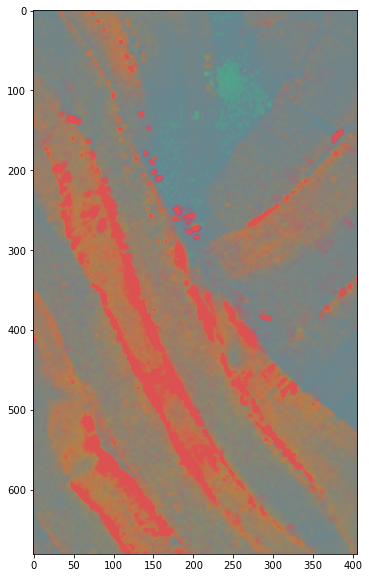

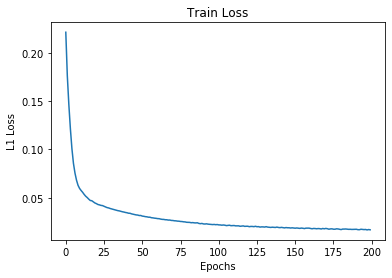

100%|██████████| 200/200 [00:54<00:00,  3.65it/s]


In [13]:
n_epochs = 200
L1_loss = []
z_imgs = []

for epoch in tqdm(range(1, n_epochs+1)):
    # monitor training loss
    train_loss = 0.0

    #Training
    for images in img_stack:
        images = images[None, :]
        image_x_p = torch.permute(images, (0, 3, 1, 2))
        image_x_p = image_x_p.to(device)
        optimizer.zero_grad()         
        #outputs = model(image_x_p)
        z = model.forward_enc(image_x_p)
        outputs = model.forward_dec(z)
        
        # reconstruction loss
        loss_recon = criterion(outputs, image_x_p)
        
        # variance-ordering loss
        msq0 = meansq(z[:,0,:,:])
        msq1 = meansq(z[:,1,:,:])
        msq2 = meansq(z[:,2,:,:])
        loss_varianceOrdering = f.relu(msq1-msq0) + f.relu(msq2-msq1)
        
        # interchannel correlation loss
        corr01 = corr(z[:,0,:,:],z[:,1,:,:])
        corr02 = corr(z[:,0,:,:],z[:,2,:,:])
        corr12 = corr(z[:,1,:,:],z[:,2,:,:])
        loss_corr = corr01 + corr02 + corr12
        
        # total loss
        loss = loss_recon + loss_varianceOrdering + 1e-3*loss_corr
        
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*image_x_p.size(0)
          
    train_loss = train_loss/len(img_stack)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
    L1_loss.append(train_loss)
    
    if epoch%50 == 0:
        # visualize latent space
        temp_img = visualize_z(3)
        z_imgs.append(temp_img)
        # plot loss curve
        plt.plot(L1_loss)
        plt.title('Train Loss')
        plt.xlabel('Epochs')
        plt.ylabel('L1 Loss')
        plt.show()

# Analyze latent space images

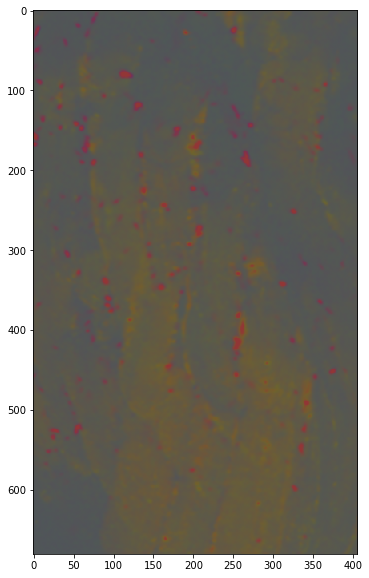

array([[238.91983, 230.38858, 217.69135],
       [240.46083, 228.60701, 217.93214],
       [240.7147 , 229.66235, 216.62296],
       ...,
       [232.77411, 234.58626, 219.63962],
       [234.0291 , 231.57214, 221.39847],
       [232.93515, 234.73259, 219.33215]], dtype=float32)

In [32]:
img = visualize_z(2)
imgsum = sum(img,2)
imgsum

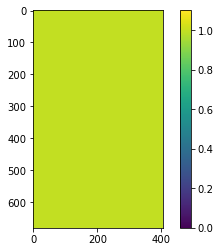

In [51]:
# test
images = img_stack[1]
images = images[None, :]
image_x_p = torch.permute(images, (0, 3, 1, 2))
image_x_p = image_x_p.to(device)
optimizer.zero_grad()         
#outputs = model(image_x_p)
z = model.forward_enc(image_x_p)

z.shape

zsum = torch.sum(z,1)

plt.imshow( zsum.detach().cpu().numpy().squeeze(),vmin=0., vmax=1.1 )
plt.colorbar()
plt.show()



In [26]:
img_stack[1]

tensor([[[ 9.3201e-03,  1.5979e-02,  1.0860e-02,  ...,  1.2023e-03,
          -1.1927e-02,  4.7328e-04],
         [ 6.9301e-03,  1.1901e-02,  7.1274e-03,  ...,  5.5700e-03,
          -9.7670e-03,  3.4160e-03],
         [ 3.7467e-03,  8.1204e-03,  1.3716e-02,  ...,  5.6694e-03,
          -2.5224e-03,  1.6174e-03],
         ...,
         [ 9.2323e-04,  5.1352e-02,  6.9349e-02,  ...,  4.5247e-02,
           3.3827e-02,  2.0773e-02],
         [ 1.0497e-02,  5.2857e-02,  6.7425e-02,  ...,  4.3076e-02,
           4.2239e-02,  2.4767e-02],
         [ 7.9035e-03,  6.1996e-02,  6.6521e-02,  ...,  4.0352e-02,
           3.8618e-02,  1.9000e-02]],

        [[ 5.9691e-03,  1.3551e-02,  1.0695e-02,  ..., -2.5196e-03,
          -4.0417e-03,  1.0264e-04],
         [ 1.0571e-02,  1.4248e-02,  1.2113e-02,  ...,  1.2439e-02,
          -9.5483e-03,  4.5957e-03],
         [ 1.4877e-02,  5.4159e-03,  1.7780e-02,  ...,  1.9610e-02,
          -5.7645e-03,  2.8374e-03],
         ...,
         [ 1.4204e-03,  5

In [15]:
z_imgs = np.asarray(z_imgs)
print(z_imgs.shape)

(4, 681, 406, 3)


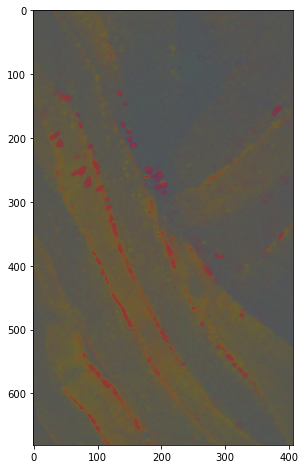

In [24]:
plt.figure(figsize=(8,8))
plt.imshow(z_imgs[2,:,:,:])
plt.show()

In [ ]:
# iterate through the latent space image stack and save the images
n_count = 0
for img in z_imgs:
    io.imsave('img' + str(n_count) + '.png', img)
    n_count = n_count + 1

In [ ]:
# use the saved latent space images to create a movie
image_folder = '/home/arya1080/python_projects/CNN_TAM'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()